# Simple GAN 
A simple GAN to learn to create rsquares from random samples


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import Adam
import matplotlib.pyplot as plt


## Build and train the GAN

In [2]:
def generate_real_samples(n_samples):
    X = np.zeros((n_samples, 28, 28))
    for i in range(n_samples):
        start = np.random.randint(5, 20)
        end = start + np.random.randint(5, 10)
        X[i, start:end, start:end] = 1
    y = np.ones((n_samples, 1))
    return X, y


In [3]:
# Generator
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=latent_dim))
    model.add(Dense(784, activation='sigmoid'))  # 28x28 image
    model.add(Reshape((28, 28)))
    return model

# Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model


In [4]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model


In [5]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model


In [6]:
import sys

def train_gan(generator, discriminator, gan, latent_dim, n_epochs=1000, n_batch=128):
    for i in range(n_epochs):
        # Prepare real samples
        x_real, y_real = generate_real_samples(n_batch // 2)
        
        # Prepare fake samples
        x_input = np.random.randn(latent_dim * n_batch // 2)
        x_input = x_input.reshape(n_batch // 2, latent_dim)
        x_fake = generator.predict(x_input)
        y_fake = np.zeros((n_batch // 2, 1))
        
        # Update discriminator
        discriminator.train_on_batch(x_real, y_real)
        discriminator.train_on_batch(x_fake, y_fake)
        
        # Update generator
        x_gan = np.random.randn(latent_dim * n_batch)
        x_gan = x_gan.reshape(n_batch, latent_dim)
        y_gan = np.ones((n_batch, 1))
        gan.train_on_batch(x_gan, y_gan)

        # Print the epoch number
        if i >= n_epochs - 10:
            print(f'Epoch {i+1}', end=' ')
        else:
            sys.stdout.write(f'\rEpoch {i+1}')
            sys.stdout.flush()
    
        print()  # Ensure the next output is on a new line

        if i % 1000 == 0:
            summarize_performance(i, generator, latent_dim)


In [7]:
def summarize_performance(epoch, generator, latent_dim, n_samples=10):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    images = generator.predict(x_input)
    
    plt.figure(figsize=(10, 10))
    for i in range(n_samples):
        plt.subplot(5, 5, 1 + i)
        plt.imshow(images[i, :, :], cmap='gray_r')
        plt.axis('off')
    plt.show()


2/2 [==============================] - 0s 2ms/step
Epoch 1
1/1 [==============================] - 0s 28ms/step


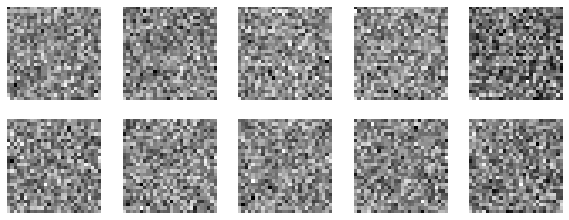

2/2 [==============================] - 0s 1ms/step
Epoch 2
2/2 [==============================] - 0s 872us/step
Epoch 3
2/2 [==============================] - 0s 1ms/step
Epoch 4
2/2 [==============================] - 0s 863us/step
Epoch 5
2/2 [==============================] - 0s 992us/step
Epoch 6
2/2 [==============================] - 0s 913us/step
Epoch 7
2/2 [==============================] - 0s 1ms/step
Epoch 8
2/2 [==============================] - 0s 1ms/step
Epoch 9
2/2 [==============================] - 0s 979us/step
Epoch 10
2/2 [==============================] - 0s 1ms/step
Epoch 11
2/2 [==============================] - 0s 983us/step
Epoch 12
2/2 [==============================] - 0s 910us/step
Epoch 13
2/2 [==============================] - 0s 1ms/step
Epoch 14
2/2 [==============================] - 0s 1ms/step
Epoch 15
2/2 [==============================] - 0s 954us/step
Epoch 16
2/2 [==============================] - 0s 988us/step
Epoch 17
2/2 [=========================

In [8]:
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, latent_dim)


## Use the trained generator

1/1 [==============================] - 0s 13ms/step


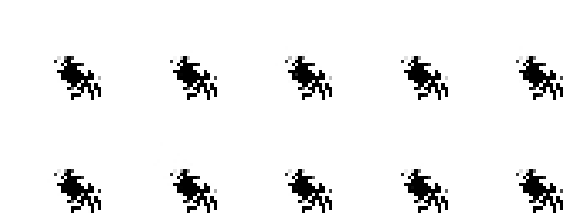

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and plot new images
def generate_and_plot_squares(generator, latent_dim, n_samples=10):
    # Generate latent points
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    
    # Generate images
    images = generator.predict(x_input)
    
    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(n_samples):
        plt.subplot(5, 5, 1 + i)
        plt.imshow(images[i, :, :], cmap='gray_r')
        plt.axis('off')
    plt.show()

# Generate and plot squares using the trained generator
generate_and_plot_squares(generator, latent_dim)
